In [1]:
import pandas as pd
import numpy as np
from Class_Network import *
import matplotlib.pylab as plt

In [2]:
"""
data can be found on https://archive.ics.uci.edu/ml/datasets/banknote+authentication

Columns:
1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

"""
df = pd.read_csv("data_banknote_authentication.txt",header=None)

In [3]:
df

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
# 5 Classes in 8-Dimensional Space
np.random.seed(15)
noise = 0.1
InputClasses = np.array([[1,0,1,0,0,1,1,0],
                         [0,1,0,1,0,1,0,1],
                         [0,1,1,0,1,0,0,1],
                         [1,0,0,0,1,0,1,1],
                         [1,0,0,1,0,1,0,1]], dtype=float)
OutputClasses = np.array([[1,0,0,0,0],
                          [0,1,0,0,0],
                          [0,0,1,0,0],
                          [0,0,0,1,0],
                          [0,0,0,0,1]], dtype=float)
n_input = np.shape(InputClasses)[1]
n_output = np.shape(OutputClasses)[1]
n_classes = np.shape(InputClasses)[0]

# Create a training dataset
n_samples = 100
training_output = []
training_input = []
for idx in range(n_samples):
    k = np.random.randint(n_classes)
    x = InputClasses[k,:] + np.random.normal(size=n_input)*noise
    t = OutputClasses[k,:]
    training_input.append(x)
    training_output.append(t)

# Create a test dataset
n_samples = 100
test_output = []
test_input = []
for idx in range(n_samples):
    k = np.random.randint(n_classes)
    x = InputClasses[k,:] + np.random.normal(size=n_input)*noise
    t = OutputClasses[k,:]
    test_input.append(x)
    test_output.append(t)

train = [np.array(training_input), np.array(training_output)]
test = [np.array(test_input), np.array(test_output)]

In [5]:
net = Network([n_input, 6, n_output], type='classifier', prior_dist_weight = ['gaussian','gaussian'], prior_dist_bias = ['gaussian', 'gaussian','gaussian'])



In [6]:
# Evaluate it before training
CE = net.Evaluate(train[0], train[1])
accuracy = net.ClassificationAccuracy(train[0], train[1])
print('Cross Entropy = '+str(CE))
print('     Accuracy = '+str(accuracy*100.)+'%')

Cross Entropy = 3.9522981281622083
     Accuracy = 18.999999999999993%


In [7]:
net.Learn(train[0], train[1], epochs=500, lrate=0.5, times = 200, bootstrap = True, progress=True)

In [8]:
print(net.lyr[1].bias_vector.mu)
print(net.lyr[1].bias_vector.sigma)
print(net.weight_matrix[0].mu)
print(net.weight_matrix[0].sigma)

[[-0.39091136 -0.88704934 -0.41404809 -0.18937156 -0.37399018 -0.57485089]]
[[1. 1. 1. 1. 1. 1.]]
[[ 0.69637385  0.0514275  -0.99736838 -2.57407359  0.81192542 -1.62023896]
 [ 0.0750643   0.17310235  0.77262125  2.20991782 -0.1390823   1.14557438]
 [-0.23015832  3.57651253  4.04717198  1.99960082  0.2485858   2.70126576]
 [ 0.49871542 -1.94447345 -2.08305028 -0.78368943  0.55892181 -2.25034443]
 [ 1.74219263  0.12005812 -0.10241085  1.11658816  0.53993449  1.83499536]
 [-0.88359433  0.13727549 -0.03418912 -1.21390776  0.15169806 -2.06882068]
 [-1.18085574  0.43019056 -0.46644427 -2.44312095 -0.75204639 -1.17376108]
 [ 2.29127523 -1.9241868  -2.29063641  0.35404818  1.10611843 -0.42961791]]
[[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]


In [9]:
net.weight_matrix[0].mu

array([[ 0.69637385,  0.0514275 , -0.99736838, -2.57407359,  0.81192542,
        -1.62023896],
       [ 0.0750643 ,  0.17310235,  0.77262125,  2.20991782, -0.1390823 ,
         1.14557438],
       [-0.23015832,  3.57651253,  4.04717198,  1.99960082,  0.2485858 ,
         2.70126576],
       [ 0.49871542, -1.94447345, -2.08305028, -0.78368943,  0.55892181,
        -2.25034443],
       [ 1.74219263,  0.12005812, -0.10241085,  1.11658816,  0.53993449,
         1.83499536],
       [-0.88359433,  0.13727549, -0.03418912, -1.21390776,  0.15169806,
        -2.06882068],
       [-1.18085574,  0.43019056, -0.46644427, -2.44312095, -0.75204639,
        -1.17376108],
       [ 2.29127523, -1.9241868 , -2.29063641,  0.35404818,  1.10611843,
        -0.42961791]])

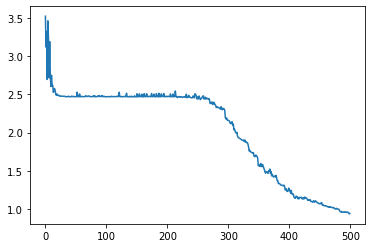

In [10]:
plt.plot(net.cost_history);

In [11]:
print('Training Set')
CE = net.Evaluate(train[0], train[1])
accuracy = net.ClassificationAccuracy(train[0], train[1])
print('Cross Entropy = '+str(CE))
print('     Accuracy = '+str(accuracy*100.)+'%')

Training Set
Cross Entropy = 1.2867727704203162
     Accuracy = 68.0%


In [12]:
print('Test Set')
CE = net.Evaluate(test[0], test[1])
accuracy = net.ClassificationAccuracy(test[0], test[1])
print('Cross Entropy = '+str(CE))
print('     Accuracy = '+str(accuracy*100.)+'%')

Test Set
Cross Entropy = 3.539482664950656
     Accuracy = 67.0%


In [13]:
df = pd.DataFrame(columns = range(5), index = range(100))
df

,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN


In [14]:
temp = [[[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5]],[[2,3,4,5,6],[2,3,4,5,6],[2,3,4,5,6]]]
temp[[0,1]]

TypeError: list indices must be integers or slices, not list

In [ ]:
test = np.random.randint(10, size = (2, 5))